## Planteamiento del problema de Riesgo de derrumbamiento - Terremotos

Estamos intentando predecir la variable dameage_grade, que representa el nivel de daño del edificio afectado por el terremoto. Hay diferentes grados de daños:
- *1*  representa un daño bajo
- *2*  representa un daño medio
- *3*  representa una destrucción casi completa

El conjunto de datos consiste principalmente en información sobre la estructura de los edificios y su propiedad legal. Cada conjunto de datos representa un edificio afectado por el terremoto de Gorkha.

Hay 39 columnas en este conjunto de datos, donde la columna *building_id* es un identificador único y aleatorio. Las variables categóricas se han ocultado con caracteres minúsculos aleatorios. La aparición del mismo carácter en columnas distintas no implica el mismo valor original.

A continuación, dejo una breve explicación de cada uno de las 38 características:

- ***geo_level_1_id***, ***geo_level_2_id***, ***geo_level_3_id*** : región geográfica en la que existe el edificio, desde la más grande (nivel 1) hasta la subregión más específica (nivel 3). Valores posibles: nivel 1: 0-30, nivel 2: 0-1427, nivel 3: 0-12567.

- ***count_floors_pre_eq***: número de plantas del edificio antes del terremoto.

- ***age*** : edad del edificio en años.

- ***area_percentage*** : área normalizada de la huella del edificio.

- ***altura_porcentaje*** : altura normalizada de la huella del edificio.

- ***land_surface_condition*** : estado de la superficie del terreno donde se construyó el edificio. Valores posibles: n, o, t.

- ***foundation_type*** : tipo de cimentación utilizado durante la construcción. Valores posibles: h, i, r, u, w.

- ***roof_type*** : tipo de tejado utilizado durante la construcción. Valores posibles: n, q, x.

- ***ground_floor_type*** : tipo de la planta baja. Valores posibles: f, m, v, x, z.

- ***other_floor_type*** : tipo de construcciones utilizadas en plantas superiores a la baja (excepto de tejado). Valores posibles: j, q, s, x.

- ***position*** : posición del edificio. Valores posibles: j, o, s, t.

- ***plan_configuration*** : configuración de la planta del edificio. Valores posibles: a, c, d, f, m, n, o, q, s, u.

- ***has_superstructure_adobe_mud*** : variable flag que indica si la superestructura era de Adobe/Mud.

- ***has_superstructure_mud_mortar_stone*** : variable de bandera que indica si la superestructura estaba hecha de Barro-Mortero-Piedra.

- ***has_superstructure_stone_flag*** : variable bandera que indica si la superestructura era de Piedra.

- ***has_superstructure_cement_mortar_stone*** : variable bandera que indica si la superestructura era de Mortero de Cemento - Piedra.

- ***has_superstructure_mud_mortar_brick*** : variable de bandera que indica si la superestructura era de Mortero de Barro - Ladrillo.

- ***has_superstructure_cement_mortar_brick*** : variable de bandera que indica si la superestructura era de Mortero de Cemento - Ladrillo.

- ***has_superstructure_timber*** : variable de bandera que indica si la superestructura es de madera.

- ***has_superstructure_bamboo*** : variable de bandera que indica si la superestructura era de Bambú.

- ***has_superstructure_rc_non_engineered*** : variable de bandera que indica si la superestructura era de hormigón armado no diseñado.

- ***has_superstructure_rc_engineered*** : variable de bandera que indica si la superestructura es de hormigón armado diseñado.

- ***has_superstructure_other*** : variable de bandera que indica si la superestructura era de cualquier otro material.

- ***legal_ownership_status*** : estado de propiedad legal del terreno donde se construyó el edificio. Valores posibles: a, r, v, w.

- ***count_families*** : número de familias que viven en el edificio.

- ***has_secondary_use*** : variable flag que indica si el edificio se utilizó para algún fin secundario.

- ***has_secondary_use_agriculture*** : variable flag que indica si el edificio se utilizó con fines agrícolas.

- ***has_secondary_use_hotel*** : variable de bandera que indica si el edificio se utilizó como hotel.

- ***has_secondary_use_rental*** : variable de bandera que indica si el edificio se utilizó con fines de alquiler.

- ***has_secondary_use_institution*** : variable de bandera que indica si el edificio se utilizó como sede de alguna institución.

- ***has_secondary_use_school*** : variable de bandera que indica si el edificio se utilizó como escuela.

- ***has_secondary_use_industry*** : variable de bandera que indica si el edificio se utilizó con fines industriales.

- ***has_secondary_use_health_post*** : variable de bandera que indica si el edificio se utilizó como puesto sanitario.

- ***has_secondary_use_gov_office*** : variable de bandera que indica si el edificio se utilizó fas una oficina gubernamental.

- ***has_secondary_use_use_police*** : variable de bandera que indica si el edificio se utilizó como comisaría de policía.

- ***has_secondary_use_other*** : variable de bandera que indica si el edificio se utilizó secundariamente para otros fines.


In [25]:
# Importaciones necesarias
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [26]:
# Importamos los dos ficheros el train y el test
url1 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/train_values.csv'
dftrain = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/test_values.csv'
dftest = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento/train_labels.csv'
dftrain_y = pd.read_csv(url3)

In [27]:
# Vista del dataframe sin modificaciónes
dftrain

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


### Tratado de datos

Lo que primeramente se debe hacer, es preparar el dataframe.<br>
En primer lugar, vamos a comprobar que ninguno de los valores sean o tengan valores nulos.

#### Tratamiento del DataFrame dftrain

In [28]:
dftrain.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Como podemos ver ninguno de los datos que hay son nulos, ahora, vamos a pasar los datos de categóricos a numéricos donde haga falta.

In [29]:
#Mostramos que tipo de dato contiene cada columna de dataframe, luego de obtenerlos. Se transforman los datos que hagan falta.
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [30]:
dftrain['land_surface_condition'] = dftrain['land_surface_condition'].replace({'n': 0, 'o': 1, 't': 2})
dftrain['foundation_type'] = dftrain['foundation_type'].replace({'h': 0, 'i': 1, 'r': 2, 'u': 3, 'w': 4})
dftrain['roof_type'] = dftrain['roof_type'].replace({'n': 0, 'q': 1, 'x': 2})
dftrain['ground_floor_type'] = dftrain['ground_floor_type'].replace({'f': 0, 'm': 1, 'v': 2, 'x': 3, 'z': 4})
dftrain['other_floor_type'] = dftrain['other_floor_type'].replace({'j': 0, 'q': 1, 's': 2, 'x': 3})
dftrain['position'] = dftrain['position'].replace({'j': 0, 'o': 1, 's': 2, 't': 3})
dftrain['plan_configuration'] = dftrain['plan_configuration'].replace({'a': 0, 'c': 1, 'd': 2, 'f': 3, 'm': 4, 'n': 5, 'o': 6, 'q': 7, 's': 8, 'u': 9})
dftrain['legal_ownership_status'] = dftrain['legal_ownership_status'].replace({'a': 0, 'r': 1, 'v': 2, 'w': 3})

In [31]:
#Volvemos a mostrar la info del dataframe para confirmar que las variables han sido cambiadas de categoricos a numéricos
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int64
 9   foundation_type                         260601 non-null  int64
 10  roof_type                               260601 non-null  int64
 11  

#### Tratamiento del DataFrame dftest
Tras haber tratado los datos del dftrain se va a realizar el mismo proceso con los valores de dftest

In [32]:
dftest.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Como podemos ver ninguno de los datos que hay son nulos, ahora, vamos a pasar los datos de categóricos a numéricos donde haga falta.

In [33]:
#Mostramos que tipo de dato contiene cada columna de dataframe, luego de obtenerlos. Se transforman los datos que hagan falta.
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [34]:
dftest['land_surface_condition'] = dftest['land_surface_condition'].replace({'n': 0, 'o': 1, 't': 2})
dftest['foundation_type'] = dftest['foundation_type'].replace({'h': 0, 'i': 1, 'r': 2, 'u': 3, 'w': 4})
dftest['roof_type'] = dftest['roof_type'].replace({'n': 0, 'q': 1, 'x': 2})
dftest['ground_floor_type'] = dftest['ground_floor_type'].replace({'f': 0, 'm': 1, 'v': 2, 'x': 3, 'z': 4})
dftest['other_floor_type'] = dftest['other_floor_type'].replace({'j': 0, 'q': 1, 's': 2, 'x': 3})
dftest['position'] = dftest['position'].replace({'j': 0, 'o': 1, 's': 2, 't': 3})
dftest['plan_configuration'] = dftest['plan_configuration'].replace({'a': 0, 'c': 1, 'd': 2, 'f': 3, 'm': 4, 'n': 5, 'o': 6, 'q': 7, 's': 8, 'u': 9})
dftest['legal_ownership_status'] = dftest['legal_ownership_status'].replace({'a': 0, 'r': 1, 'v': 2, 'w': 3})

In [35]:
#Volvemos a mostrar la info del dataframe para confirmar que las variables han sido cambiadas de categoricos a numéricos
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             86868 non-null  int64
 1   geo_level_1_id                          86868 non-null  int64
 2   geo_level_2_id                          86868 non-null  int64
 3   geo_level_3_id                          86868 non-null  int64
 4   count_floors_pre_eq                     86868 non-null  int64
 5   age                                     86868 non-null  int64
 6   area_percentage                         86868 non-null  int64
 7   height_percentage                       86868 non-null  int64
 8   land_surface_condition                  86868 non-null  int64
 9   foundation_type                         86868 non-null  int64
 10  roof_type                               86868 non-null  int64
 11  ground_floor_ty

### Matríz de Correlación

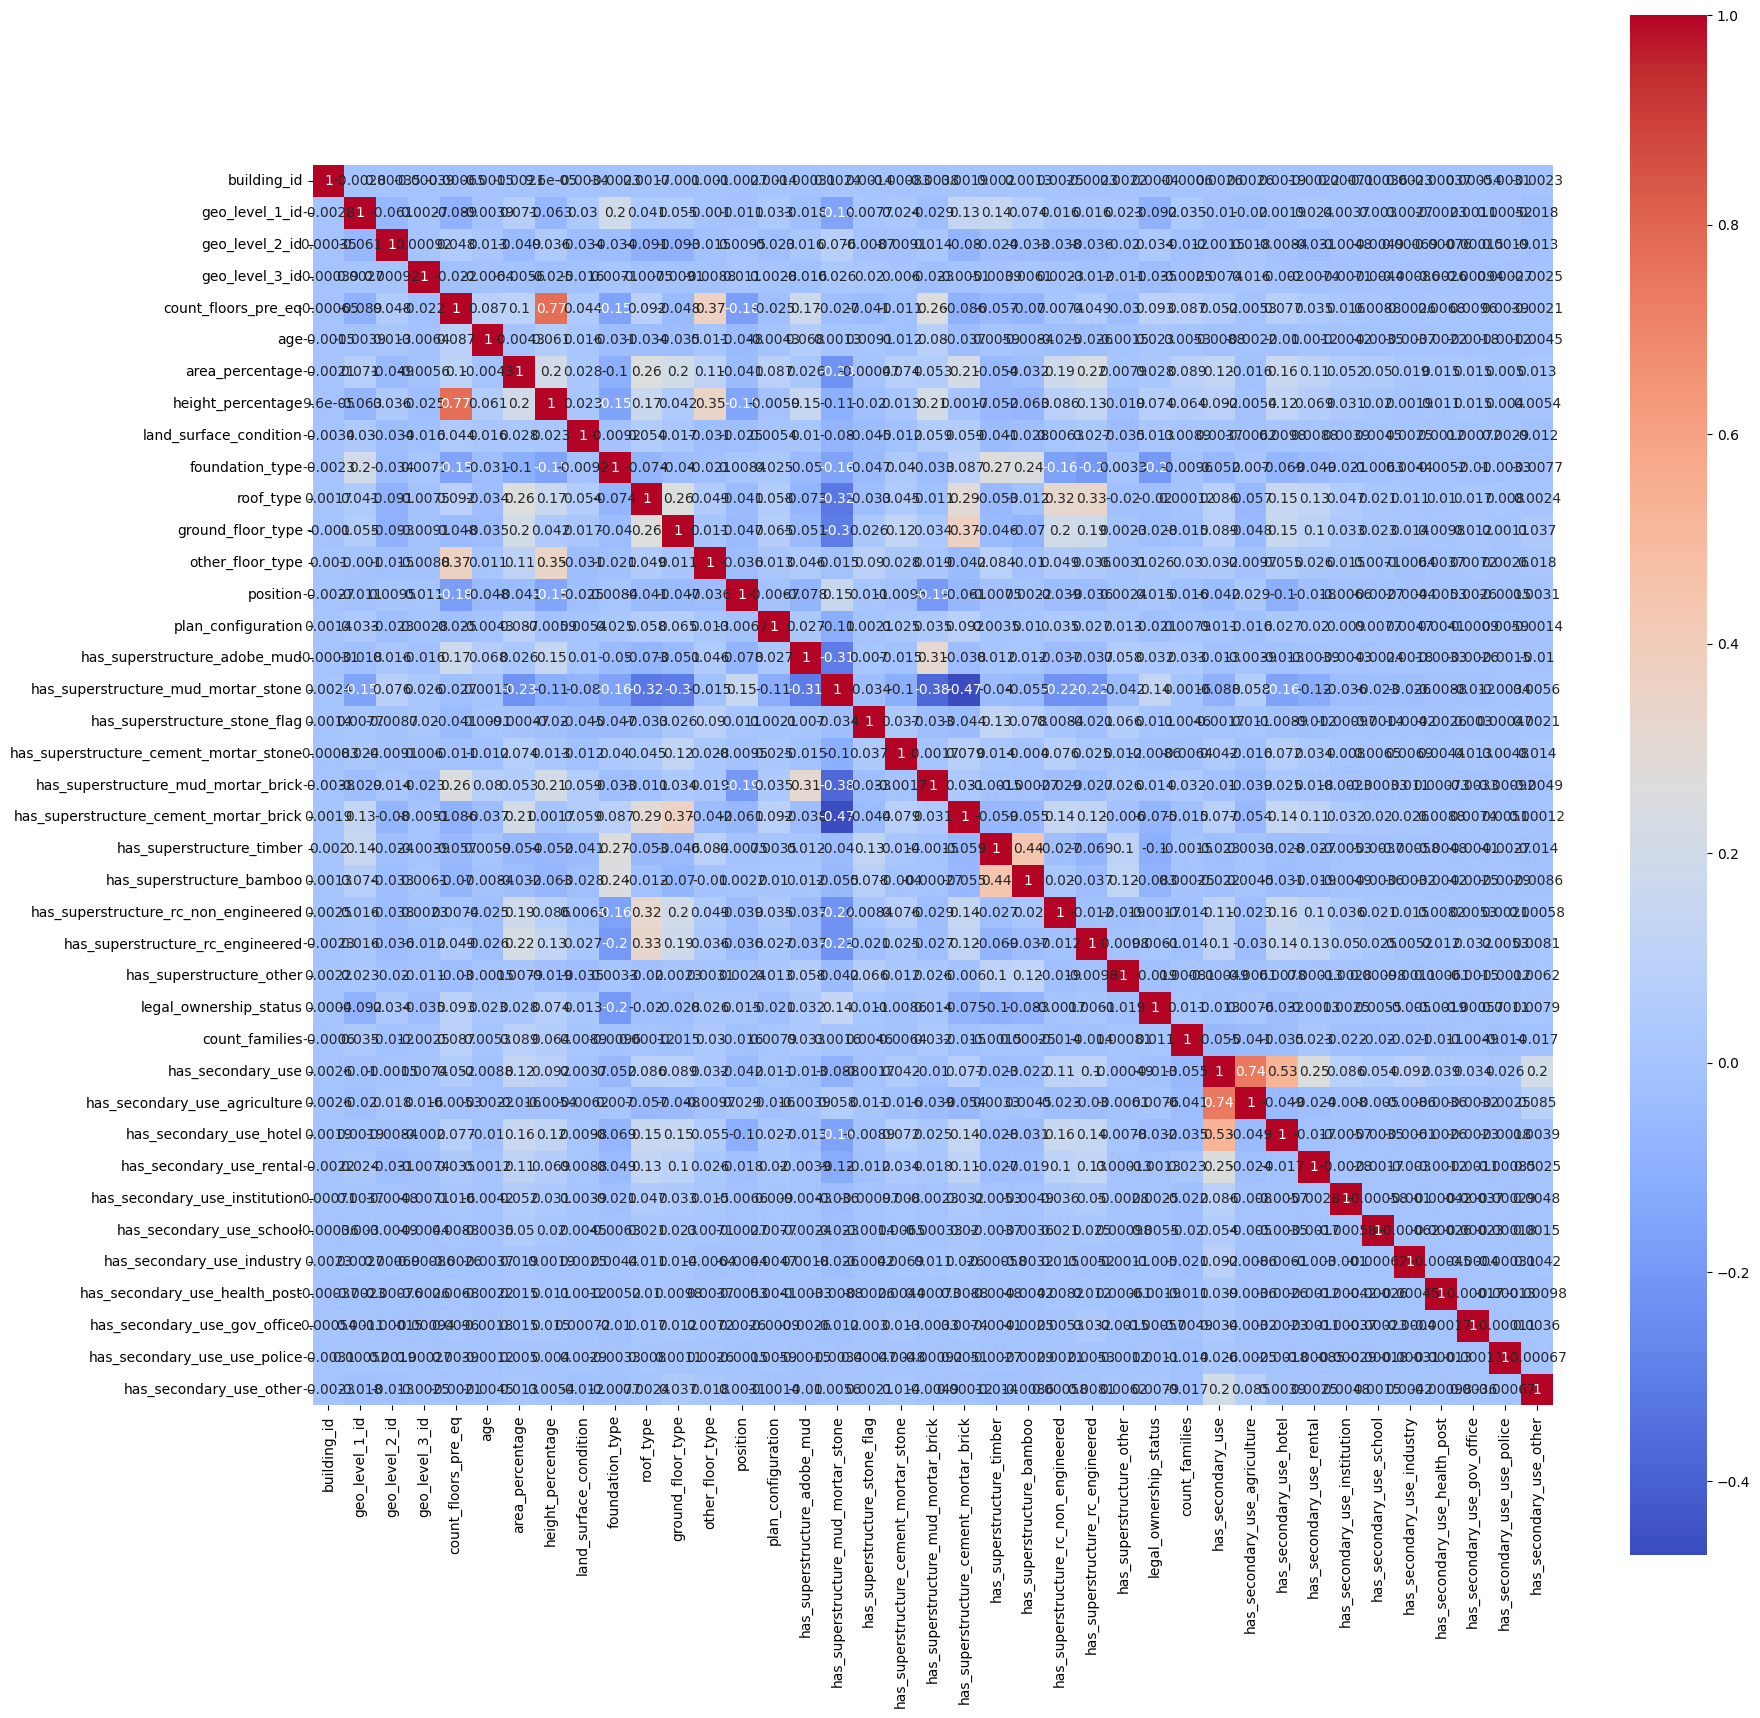

In [37]:
# Crear el heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(dftrain.corr(), cmap='coolwarm', annot=True, square=True)
# Encontré un parámetro  que te lo realiza todo como una huella calorifica, es decir, 
# los que tienen más correlación te los pone en rojo y los que menos te los pone en azul
plt.show()

La matríz de correlación no nos proporciona mucha información ya que dice que todas las columnas entre ellas no tienen mucha correlación, es decir,